In [2]:
#Assignment_7

In [3]:
#Question

'''

Generate a dummy dataset using Scikit-Learn having high dimensionality
and total 4 classes. For this dataset, first implement K-Means clustering 
and then use the clusters for classification purpose. Now using the same dataset,
implement spherical clustering and then check accuracy for classification. 
Notice the change in accuracy. You may also plot the obtained clusters from both 
the methods using t-SNE plots or by projecting data into two dimensions using PCA.

'''

'\n\nGenerate a dummy dataset using Scikit-Learn having high dimensionality\nand total 4 classes. For this dataset, first implement K-Means clustering \nand then use the clusters for classification purpose. Now using the same dataset,\nimplement spherical clustering and then check accuracy for classification. \nNotice the change in accuracy. You may also plot the obtained clusters from both \nthe methods using t-SNE plots or by projecting data into two dimensions using PCA.\n\n'

In [5]:
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from soyclustering import SphericalKMeans
from scipy.sparse import csr_matrix
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np

In [6]:
#default features=20
X, y = make_classification(n_samples=1000, n_classes=4, n_clusters_per_class=1, random_state=10)

In [7]:
X.shape

(1000, 20)

In [8]:
y.shape

(1000,)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [10]:
X_train.shape

(750, 20)

In [11]:
X_test.shape
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)

X_train = tsne.fit_transform(X_train)
X_test = tsne.fit_transform(X_test)

print(X_train.shape)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 750 samples in 0.001s...
[t-SNE] Computed neighbors for 750 samples in 0.038s...
[t-SNE] Computed conditional probabilities for sample 750 / 750
[t-SNE] Mean sigma: 1.700601
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.687149
[t-SNE] KL divergence after 300 iterations: 1.950066
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 250 samples in 0.000s...
[t-SNE] Computed neighbors for 250 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 250 / 250
[t-SNE] Mean sigma: 1.995815
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.622963
[t-SNE] KL divergence after 300 iterations: 1.460441
(750, 2)


In [12]:
kmeans = KMeans(n_clusters=4).fit(X_train)

In [13]:
kmeans.cluster_centers_.shape

(4, 2)

In [14]:
kmeans.labels_.shape

(750,)

In [15]:
kmeans.cluster_centers_.shape

(4, 2)

In [16]:
y_pred = kmeans.predict(X_test)
y_pred

array([3, 2, 3, 2, 3, 0, 0, 0, 3, 3, 0, 3, 2, 0, 2, 2, 3, 3, 2, 1, 2, 0,
       2, 1, 2, 0, 1, 2, 2, 2, 2, 0, 3, 0, 0, 3, 3, 0, 0, 0, 1, 1, 3, 2,
       0, 0, 3, 2, 3, 2, 2, 0, 0, 2, 2, 3, 2, 2, 3, 2, 2, 3, 0, 2, 3, 1,
       3, 0, 1, 2, 0, 3, 2, 3, 2, 3, 3, 2, 2, 0, 1, 2, 0, 1, 1, 2, 0, 2,
       0, 0, 0, 3, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 0, 2, 3, 3, 1, 2, 2, 2,
       1, 3, 0, 0, 2, 2, 3, 3, 0, 0, 2, 2, 0, 1, 3, 3, 0, 2, 2, 2, 2, 3,
       1, 0, 0, 1, 2, 3, 3, 3, 1, 2, 2, 0, 2, 0, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 3, 2, 3, 2, 2, 3, 3, 2, 1, 3, 1, 3, 3, 2, 2, 2, 0, 3, 1,
       1, 0, 0, 1, 2, 2, 3, 0, 0, 3, 3, 3, 3, 2, 0, 1, 0, 3, 0, 3, 3, 2,
       3, 3, 3, 3, 3, 2, 2, 2, 1, 1, 3, 2, 2, 3, 3, 2, 1, 2, 0, 3, 1, 0,
       3, 0, 1, 3, 2, 0, 3, 0, 2, 3, 2, 0, 1, 2, 0, 0, 1, 3, 2, 1, 1, 2,
       3, 2, 3, 1, 0, 3, 1, 2], dtype=int32)

In [17]:
acc = accuracy_score(y_pred, y_test)

In [18]:
print(acc)

X_test[:5]

0.156


array([[-3.5886788 , -4.8660493 ],
       [-0.46757716,  0.82501954],
       [ 1.8557918 , -3.9246006 ],
       [ 2.9002721 ,  1.2383687 ],
       [ 1.7198299 , -4.8173423 ]], dtype=float32)

In [19]:
cluster = [[], [], [], []]
for i in range(X_test.shape[0]):
    cluster[y_pred[i]].append(X_test[i])
cluster1 = np.array(cluster[0])
cluster2 = np.array(cluster[1])
cluster3 = np.array(cluster[2])
cluster4 = np.array(cluster[3])
cluster1

array([[ -4.2210455 ,   5.2375865 ],
       [ -5.3940454 ,   2.511617  ],
       [ -5.0875616 ,   0.7974411 ],
       [ -3.5841188 ,   1.8875548 ],
       [ -5.151289  ,   9.053758  ],
       [ -5.663695  ,   7.305885  ],
       [-11.716963  ,  -2.6413453 ],
       [ -7.635912  ,   1.274221  ],
       [ -4.6020126 ,   0.10663971],
       [ -6.481026  ,   3.8140652 ],
       [ -4.7636766 ,   7.426208  ],
       [-12.050737  ,  -4.398204  ],
       [ -7.454882  ,  -0.60371804],
       [ -3.180012  ,   0.4951146 ],
       [ -6.445647  ,   2.2007456 ],
       [ -3.6763918 ,   1.8537595 ],
       [ -3.9971519 ,  -0.14517882],
       [ -6.5764155 ,   2.572585  ],
       [ -8.113184  ,   5.1563754 ],
       [ -7.4098425 ,  -0.42718476],
       [ -5.5832186 ,   4.914972  ],
       [ -7.298215  ,   2.7650187 ],
       [ -9.974233  ,  -1.9420723 ],
       [ -5.372882  ,  -0.56124157],
       [ -4.4552813 ,   1.7865    ],
       [ -9.961409  ,  -2.0551763 ],
       [-12.457537  ,   2.105519  ],
 

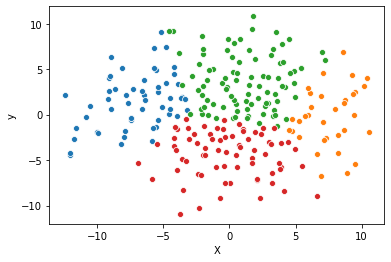

In [20]:
df = pd.DataFrame({'X': cluster1[:,0], 'y':cluster1[:,1] })
sns.scatterplot(data=df, x="X", y="y")

df = pd.DataFrame({'X': cluster2[:,0], 'y':cluster2[:,1] })
sns.scatterplot(data=df, x="X", y="y")

df = pd.DataFrame({'X': cluster3[:,0], 'y':cluster3[:,1] })
sns.scatterplot(data=df, x="X", y="y")

df = pd.DataFrame({'X': cluster4[:,0], 'y':cluster4[:,1] })
sns.scatterplot(data=df, x="X", y="y")

In [21]:
X, y = make_classification(n_samples=1000, n_classes=4, n_clusters_per_class=1, random_state=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
spherical_kmeans = SphericalKMeans(n_clusters=4)

X_train = csr_matrix(tsne.fit_transform(X_train))
X_test = csr_matrix(tsne.fit_transform(X_test))

print(X_train.shape)

skmeans = spherical_kmeans.fit(X_train)
sy_pred = skmeans.fit_predict(X_test)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 750 samples in 0.001s...
[t-SNE] Computed neighbors for 750 samples in 0.035s...
[t-SNE] Computed conditional probabilities for sample 750 / 750
[t-SNE] Mean sigma: 1.700601
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.792328
[t-SNE] KL divergence after 300 iterations: 1.962338
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 250 samples in 0.000s...
[t-SNE] Computed neighbors for 250 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 250 / 250
[t-SNE] Mean sigma: 1.995815
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.806404
[t-SNE] KL divergence after 300 iterations: 1.467597
(750, 2)


In [22]:
sy_pred

array([2, 1, 0, 3, 1, 1, 3, 2, 1, 2, 2, 0, 3, 3, 1, 0, 2, 0, 2, 0, 0, 0,
       3, 3, 3, 1, 2, 1, 2, 3, 3, 3, 1, 2, 2, 2, 1, 3, 1, 2, 3, 2, 0, 1,
       2, 0, 0, 2, 0, 2, 1, 3, 2, 3, 3, 0, 2, 1, 2, 2, 2, 0, 0, 2, 1, 1,
       0, 3, 0, 2, 2, 1, 1, 0, 3, 1, 0, 1, 2, 2, 1, 0, 0, 1, 3, 3, 3, 0,
       1, 1, 0, 1, 2, 3, 1, 2, 1, 0, 0, 1, 2, 2, 1, 3, 0, 3, 2, 0, 1, 2,
       3, 2, 3, 0, 3, 0, 2, 2, 1, 1, 0, 1, 0, 0, 2, 3, 3, 1, 2, 2, 2, 0,
       3, 0, 2, 2, 0, 0, 3, 1, 3, 2, 3, 2, 3, 3, 0, 3, 0, 0, 2, 3, 2, 1,
       3, 3, 2, 0, 0, 3, 3, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 3, 0, 2, 3, 3,
       3, 3, 1, 2, 1, 2, 1, 3, 3, 2, 0, 2, 2, 1, 3, 2, 2, 2, 1, 1, 2, 1,
       3, 3, 0, 2, 0, 1, 3, 0, 3, 1, 3, 1, 3, 2, 2, 1, 1, 0, 3, 0, 1, 0,
       0, 0, 2, 0, 0, 2, 0, 3, 1, 3, 3, 3, 1, 2, 0, 3, 0, 1, 0, 0, 0, 3,
       0, 2, 0, 3, 2, 0, 3, 1])

In [23]:
count = 0
totalCorrect = 0

In [24]:
for i in range(y_test.shape[0]):
    count += 1
    if y_test[i] == sy_pred[i]:
        totalCorrect += 1

In [25]:
print(totalCorrect, count)
sacc = (totalCorrect / count)

58 250


In [26]:
sacc

0.232

In [27]:
skmeans.cluster_centers_.shape

(4, 2)

In [28]:
cluster = [[], [], [], []]
for i in range(X_test.shape[0]):
    cluster[sy_pred[i]].append(list(X_test[i].toarray()[0]))
cluster1 = np.array(cluster[0])
cluster2 = np.array(cluster[1])
cluster3 = np.array(cluster[2])
cluster4 = np.array(cluster[3])
cluster1

array([[-4.86043406e+00,  4.46184635e+00],
       [-8.02538204e+00,  7.38628340e+00],
       [-1.28412466e+01,  1.85338092e+00],
       [-4.25634193e+00,  6.97541666e+00],
       [-1.00575190e+01, -9.01270926e-01],
       [-8.79000473e+00,  1.84186444e-01],
       [-1.43645172e+01, -5.82344830e-01],
       [-5.08235836e+00,  2.20326090e+00],
       [-1.47877944e+00,  8.17541981e+00],
       [-6.19207287e+00,  5.81176329e+00],
       [-1.24776351e+00, -6.24310225e-03],
       [-6.57137728e+00,  3.99744654e+00],
       [-3.90156007e+00,  9.64808106e-01],
       [-1.87747407e+00,  8.14839935e+00],
       [-2.87653422e+00,  2.94314432e+00],
       [-2.01410246e+00,  1.45473003e+01],
       [-1.49672353e+00,  3.99450040e+00],
       [-1.02433376e+01,  5.52020073e+00],
       [-6.97442889e-01,  4.93836975e+00],
       [-2.98725152e+00,  8.77190208e+00],
       [-5.26322556e+00,  3.92630279e-01],
       [-1.45723829e+01,  4.26926661e+00],
       [-8.70908451e+00, -5.71983814e-01],
       [-6.

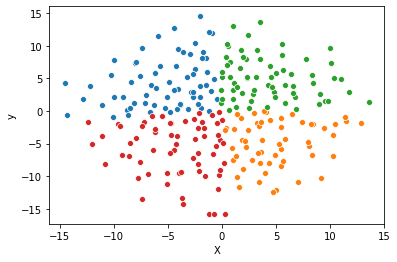

In [29]:
df = pd.DataFrame({'X': cluster1[:,0], 'y':cluster1[:,1] })
sns.scatterplot(data=df, x="X", y="y")

df = pd.DataFrame({'X': cluster2[:,0], 'y':cluster2[:,1] })
sns.scatterplot(data=df, x="X", y="y")

df = pd.DataFrame({'X': cluster3[:,0], 'y':cluster3[:,1] })
sns.scatterplot(data=df, x="X", y="y")

df = pd.DataFrame({'X': cluster4[:,0], 'y':cluster4[:,1] })
sns.scatterplot(data=df, x="X", y="y")